## 📰 Novelty Detection in News Project

### Introduction
This project aims to develop a novelty detection system applied to sports news. Novelty detection is a machine learning task that identifies new content by comparing it to previously known information.

### 📝 Dataset
We use the **LREC2018 corpus** in many categories, organized by events in subfolders:

- `source` folder: Contains 3 initial articles.
- `target` folder: Contains additional articles labeled as "novel" or "non-novel" in relation to the source articles. These articles will be used to determine if they contain new information (novel) compared to the `source` articles.

### 🔜 Tasks
1. **Novelty Detection**  
   ⚠️ Identify `novel` and `non-novel` news articles by assessing the information in each target article relative to the source articles.

2. **System Development**  
   ⚠️ Develop a system that uses the `source` folder to distinguish between `novel` and `non-novel` information in the new articles within the `target` folder. This involves creating a model that can reliably recognize new information based on content changes detected through `novelty detection algorithms`.

3. **Evaluation and Comparison**  
   ⚠️ Compare the system's results with the `Document Level Annotation (DLA)` attribute in each target article to assess the model’s accuracy using the f1-score. This comparison will validate the system’s ability to label articles accurately as "novel" or "non-novel."

4.   Analise de topicos para entender as diferenças entre os novelty e o não


Each article has a `.txt` file with the content and an accompanying `.xml` file containing metadata such as title, publication date, publisher, and other event-related information.



-----

### Libs

In [1]:
from scripts.parser import CorpusParser 
import os
import pandas as pd
import numpy as np

base_dir = os.getcwd()
corpus_dir = os.path.join(base_dir, 'database', 'TAP-DLND-1.0_LREC2018')

parser = CorpusParser(corpus_dir)
df_news = parser.parse()
df_news

,category,event_id,news_id,content,is_source,DOP,publisher,title,eventid,eventname,topic,sentence,words,sourceid,DLA,SLNS
0,SPORTS,SPTE001,SPTE001SRC003,Dangal: Baba Ramdev to wrestle it out with Rus...,True,00/00/0000,www.indiatvnews.com,Dangal-Baba Ramdev to wrestle it out with Russ...,SPTE001,Baba Ramdev wrestling challenge,SPORTS,13,269,<NA>,<NA>,<NA>
1,SPORTS,SPTE001,SPTE001SRC001,"Even as the Pro Wrestling League continues, wh...",True,00/00/0000,Indiatimes.com,Baba Ramdev Calls Out Olympic Wrestling Medall...,SPTE001,Baba Ramdev wrestling challenge,SPORTS,6,92,<NA>,<NA>,<NA>
2,SPORTS,SPTE001,SPTE001SRC002,"In the ongoing Pro Wrestling League, Haryana ...",True,00/00/0000,www.news18.com,Baba Ramdev Challenges Beijing Olympic Medalli...,SPTE001,Baba Ramdev wrestling challenge,SPORTS,14,267,<NA>,<NA>,<NA>
3,SPORTS,SPTE001,SPTE001TGT011,Yoga guru Baba Ramdev displayed his wrestling...,False,00/00/0000,www.tribuneindia.com,<NA>,SPTE001,Baba Ramdev wrestling challenge,SPORTS,14,279,"SPTE001SRC001,SPTE001SRC002,SPTE001SRC003",Novel,66.07
4,SPORTS,SPTE001,SPTE001TGT002,Yoga guru Baba Ramdev displayed his wrestli...,False,00/00/0000,u4uvoice.com,<NA>,SPTE001,Baba Ramdev wrestling challenge,SPORTS,11,243,"SPTE001SRC001,SPTE001SRC002,SPTE001SRC003",Novel,54.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6099,GOVT,GOVE008,GOVE008TGT030,﻿ Prime Minister Narendra Modi will inaugurate...,False,02/04/2017,www.newkerala.com,<NA>,GOVE008,Chenani-Nashri tunnel,GOVT,11,460,"GOVE008SRC001,GOVE008SRC002,GOVE008SRC003",non-novel,50.00
6100,GOVT,GOVE008,GOVE008TGT031,﻿Narendra Modi addresses rally in Udhampur. J...,False,02/04/2017,indiatoday.in,<NA>,GOVE008,Chenani-Nashri tunnel,GOVT,13,427,"GOVE008SRC001,GOVE008SRC002,GOVE008SRC003",non-novel,25.00
6101,GOVT,GOVE008,GOVE008TGT007,Union Road and Transport Minister Nitin Gadk...,False,02/04/2017,www.dnaindia.com,<NA>,GOVE008,Chenani-Nashri tunnel,GOVT,18,234,"GOVE008SRC001,GOVE008SRC002,GOVE008SRC003",non-novel,61.36
6102,GOVT,GOVE008,GOVE008TGT009,﻿ PM @narendramodi unveils Plaque to inaugurat...,False,02/04/2017,www.dnaindia.com,<NA>,GOVE008,Chenani-Nashri tunnel,GOVT,13,413,"GOVE008SRC001,GOVE008SRC002,GOVE008SRC003",non-novel,52.50


In [2]:
# from tabulate import tabulate
# print(tabulate(df_news, headers='keys', tablefmt='psql'))
# Contar los valores True y False en la columna 'is_source'


### Data Structure and Preprocessing news text


**tokenize / remove punctuation and stopwords**

In [3]:
from scripts.tokenize_and_normalize import tokenize_and_remove_punctuation, remove_stopwords

df_news['content_clean_tokenized'] = df_news['content'].apply(tokenize_and_remove_punctuation)
print(df_news['content_clean_tokenized'].iloc[0])

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/mab0205/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/mab0205/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


First 10 stopwords: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]
['Dangal', 'Baba', 'Ramdev', 'to', 'wrestle', 'it', 'out', 'with', 'Russian', 'Olympic', 'medallist', 'Dangal', 'Baba', 'Ramdev', 'to', 'wrestle', 'it', 'out', 'with', 'Russian', 'Olympic', 'medallist', 'Currently', 'reading', 'Dangal', 'Baba', 'Ramdev', 'to', 'wrestle', 'it', 'out', 'with', 'Russian', 'Olympic', 'medallist', 'Baba', 'Ramdev', 'Wrestling', 'Yoga', 'guru', 'Ramdev', 'will', 'challenge', 'the', 'Olympic', 'for', 'a', 'friendly', 'wrestling', 'bout', 'ahead', 'of', 'the', 'second', 'semifinal', 'match', 'between', 'Mumbai', 'Maharathi', 'and', 'NCR', 'Punjab', 'Royals', 'in', 'the', 'Pro', 'Wrestling', 'League', 'The', 'eye', 'turning', 'match', 'is', 'scheduled', 'at', 'pm', 'today', 'in', 'New', 'Delhi', 'Indira', 'Gandhi', 'Indoor', 'Stadium', 'I', 'have', 'fought', 'bouts', 'with', 'national', 'level', 'wrestlers', 'But', 'playing', 'against', 'an', 'internationally', 'r

In [4]:
# Filtrar contenido sin stopwords
df_news['content_no_sw'] = df_news['content_clean_tokenized'].apply(remove_stopwords)
print('the length of the content:',len(df_news['content_clean_tokenized'].iloc[0]))
print('the length after cleaning:',len(df_news['content_no_sw'].iloc[0]))

the length of the content: 244
the length after cleaning: 147


**Lemmatization**
- The goal is to convert words to their base form to standardize the text data. Inside the script, we need the `spacy en_core_web_sm` model to apply the lemmatization function effectively to our corpus.


In [5]:
from scripts.lemmatize_text import lemmatize_text

df_news = lemmatize_text(df_news,base_dir)
print('ORIGINAL CORPUS:\n',df_news['content'].iloc[0])
print('\nCORPUS CLEANED: \n',df_news['content_no_sw'].iloc[0])

File '/home/mab0205/GitHub/Novelty-Detection-Data-Science/results/lemmatize_text.csv' exists...
ORIGINAL CORPUS:
 Dangal: Baba Ramdev to wrestle it out with Russian Olympic medallist Dangal: Baba Ramdev to wrestle it out with Russian Olympic medallist Currently reading: Dangal: Baba Ramdev to wrestle it out with Russian Olympic medallist #Baba Ramdev , #Wrestling   14:24:22] Yoga guru Ramdev will challenge the 2008 Olympic   for a friendly wrestling bout ahead of the second semifinal match between Mumbai Maharathi and NCR Punjab Royals, in the Pro Wrestling League. 
The eye turning match is scheduled at 6:30 pm today in New Delhi's Indira Gandhi Indoor Stadium. 
“I have fought bouts with national level wrestlers. But playing against an internationally renowned player will be more exciting. You will witness the real power of yoga in this match,” said Ramdev. 
Andrey is   for beating   at the Beijing Olympics. As Andrey reached the finals   
Before the 2nd semifinal on Wednesday, these t

- After applying all the cleaning strategies, the newly processed corpus shows significant differences. This will enhance our exploratory analysis and improve model performance.


**Feature importance and remove non relevant features** 

In [6]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6104 entries, 0 to 6103
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   category                 6104 non-null   object 
 1   event_id                 6104 non-null   object 
 2   news_id                  6104 non-null   object 
 3   content                  6104 non-null   object 
 4   is_source                6104 non-null   bool   
 5   DOP                      6104 non-null   object 
 6   publisher                6103 non-null   object 
 7   title                    669 non-null    object 
 8   eventid                  6104 non-null   object 
 9   eventname                6104 non-null   object 
 10  topic                    6104 non-null   object 
 11  sentence                 6104 non-null   int64  
 12  words                    6104 non-null   int64  
 13  sourceid                 5352 non-null   object 
 14  DLA                     

In [7]:
from scripts.drop_feature import drop_constant_columns

drop_constant_columns(df_news)

No columns were dropped. All columns have multiple unique values or unhashable types.


In [8]:
df_news[:3]

,category,event_id,news_id,content,is_source,DOP,publisher,title,eventid,eventname,topic,sentence,words,sourceid,DLA,SLNS,content_clean_tokenized,content_no_sw
0,SPORTS,SPTE001,SPTE001SRC003,Dangal: Baba Ramdev to wrestle it out with Rus...,True,00/00/0000,www.indiatvnews.com,Dangal-Baba Ramdev to wrestle it out with Russ...,SPTE001,Baba Ramdev wrestling challenge,SPORTS,13,269,NaN,NaN,NaN,"['Dangal', 'Baba', 'Ramdev', 'to', 'wrestle', ...",dangal baba ramdev wrestle russian olympic med...
1,SPORTS,SPTE001,SPTE001SRC001,"Even as the Pro Wrestling League continues, wh...",True,00/00/0000,Indiatimes.com,Baba Ramdev Calls Out Olympic Wrestling Medall...,SPTE001,Baba Ramdev wrestling challenge,SPORTS,6,92,NaN,NaN,NaN,"['Even', 'as', 'the', 'Pro', 'Wrestling', 'Lea...",pro wrestling league continue draw interest ma...
2,SPORTS,SPTE001,SPTE001SRC002,"\nIn the ongoing Pro Wrestling League, Haryana...",True,00/00/0000,www.news18.com,Baba Ramdev Challenges Beijing Olympic Medalli...,SPTE001,Baba Ramdev wrestling challenge,SPORTS,14,267,NaN,NaN,NaN,"['In', 'the', 'ongoing', 'Pro', 'Wrestling', '...",ongoing pro wrestling league haryana hammers j...


- Looking at the variavels, its not interesting using the ids and the title beacause just 6 non-null

In [9]:
df_news.drop(columns=['event_id', 'news_id', 'eventid', 'sourceid', 'title', 'DOP', 'eventname' , 'SLNS'], inplace=True)
print("Columnas restantes en df_news: \n", df_news.columns)

Columnas restantes en df_news: 
 Index(['category', 'content', 'is_source', 'publisher', 'topic', 'sentence',
       'words', 'DLA', 'content_clean_tokenized', 'content_no_sw'],
      dtype='object')


- Dropped  'DOP', 'eventname' and 'topic'
- I didn't find the meaning or what SLNS measures, so removing it might be the best solution because it's difficult to handle the weight of the feature if its representation isn't clear.

- After processing the corpus, it is no longer necessary to use the columns `content_clean_tokenized` and `content`.

In [10]:
df_news.drop(columns=['content_clean_tokenized', 'content'], inplace=True)
print("Columnas restantes en df_news: \n", df_news.columns)

Columnas restantes en df_news: 
 Index(['category', 'is_source', 'publisher', 'topic', 'sentence', 'words',
       'DLA', 'content_no_sw'],
      dtype='object')


- But, what's the content of DLA column? 

In [11]:
counts = df_news['DLA'].value_counts(normalize=True) * 100

print("Percentage of each category in the 'DLA' column:")
for category, percentage in counts.items():
    print(f"{category}: {percentage:.2f}%")

Percentage of each category in the 'DLA' column:
Non-Novel: 43.61%
Novel: 42.39%
non-novel: 7.95%
novel: 6.02%
Non-Novelvel: 0.02%
NovNon-Novelel: 0.02%


**Analysis Insight:**

This information is particularly interesting because we can use `DLA` as an identifier to label news as either "Novel" or "Non-Novel." We will train our model using the `source` news as the training set and the `target` news as the test set. Finally, we’ll compare the results to evaluate how well our model identifies the novelty of new items.


In [12]:
df_news[:3]

,category,is_source,publisher,topic,sentence,words,DLA,content_no_sw
0,SPORTS,True,www.indiatvnews.com,SPORTS,13,269,NaN,dangal baba ramdev wrestle russian olympic med...
1,SPORTS,True,Indiatimes.com,SPORTS,6,92,NaN,pro wrestling league continue draw interest ma...
2,SPORTS,True,www.news18.com,SPORTS,14,267,NaN,ongoing pro wrestling league haryana hammers j...


- There are 6 null values in the `SLNS` and `DLA` columns. I will check the correlation to assess their importance and determine the best technique to handle this issue. Options include removing the data, using it for testing, or filling in the missing values.

In [13]:
df_source = df_news[df_news['is_source'] == True]
df_target = df_news[df_news['is_source'] == False]

### Exploratory Analysis

- Visualization of variable distribution
- Principal Component Analysis (PCA)
- Latent Semantics and Topic Modeling
- Correlation between variables
- A temporal analysis was not possible due to the lack of temporal data, so our task will be solely focused on classifying new data in relation to target data.

**Variable Distribution**

669 5435


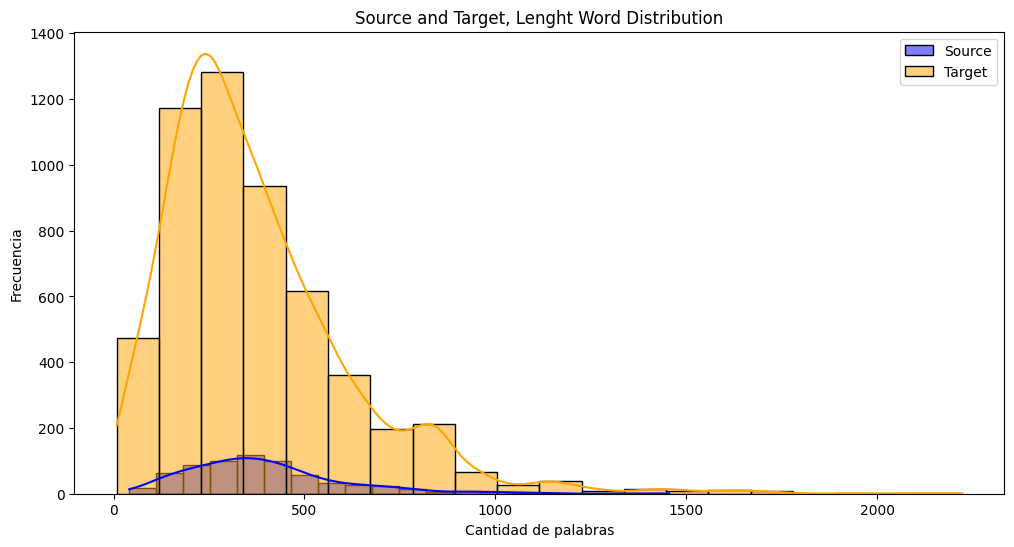

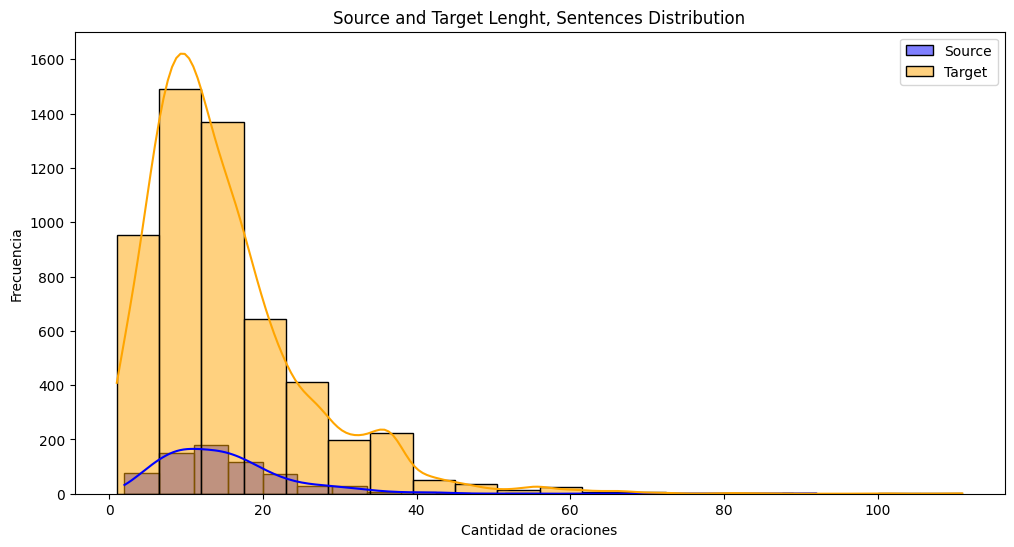

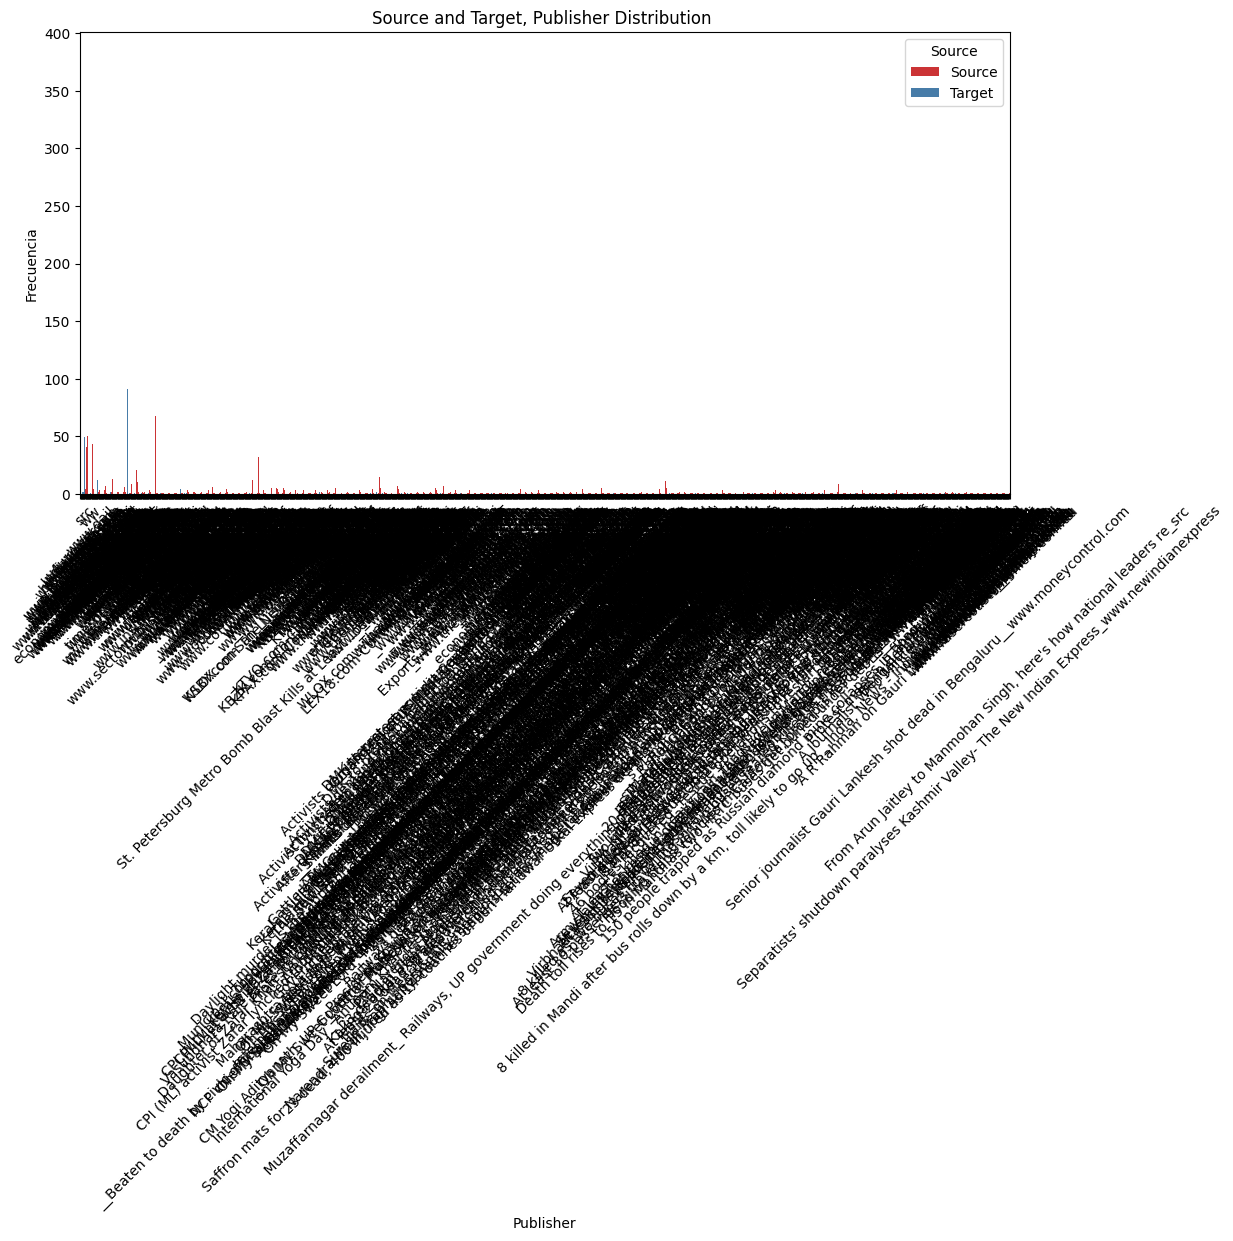

In [14]:
from Exploratory_Analysis.variable_distribution import len_words_distribution, count_sentences_distribution, publisher_distribution
print(len(df_source),len(df_target))
len_words_distribution(df_source, df_target )
count_sentences_distribution(df_source, df_target )
publisher_distribution(df_news)

**Analysis Summary:**

- The word count and sentence count distributions show distinct patterns between `source` and `target`, suggesting structural differences that could be useful for novelty detection.
- The `publisher` feature shows minimal repetition and likely introduces noise, so it may be better to exclude it. This feature could introduce noise because the model may think that a new article from a new publisher is associated with novelty. However, in this case, the dataset doesn't have titles for all of the articles, so we can't combine the title and article as a feature. Therefore, it's better to use only the corpus to identify novelty based on the content.

In [15]:
df_news.drop(columns=['publisher'], inplace=True)
print("Columnas restantes en df_news: \n", df_news.columns)

Columnas restantes en df_news: 
 Index(['category', 'is_source', 'topic', 'sentence', 'words', 'DLA',
       'content_no_sw'],
      dtype='object')



**Next Steps:**
- Extract word and sentence count as additional features to analise if that could be interesting in our analise (PCA).
- Explore other text features like keyword frequency.

###  Principal Component Analises (PCA)
-  PCA transforms the original variables into a new set of variables called principal components, which are orthogonal (uncorrelated) and ordered by the amount of variance they capture from the data. Se below how the original variables are now transformed into the same number of components.

In [16]:
from Exploratory_Analysis.pca import pca_analises
from sklearn.preprocessing import MinMaxScaler

- Selecting Characteristics for Analysis

In [17]:
null_count_dla = df_news['DLA'].isna().sum()
print(f"Number of rows with NaN in 'DLA': {null_count_dla}")

Number of rows with NaN in 'DLA': 669


- That NaN in DLA are the Source registers. So I'm gonna fill the NaN with ``Non-Novel``

In [18]:
df_news['DLA'].fillna('Non-Novel', inplace=True)

df_news['DLA'] = df_news['DLA'].apply(lambda x: 1 if x == 'Novel' else 0) # reaplace Novel -> 1 ... Non-Novel -> 0 

# Features for PCA
features = ['sentence', 'words']
df_news[features] = df_news[features].astype(float)

df_news[:3]

/tmp/ipykernel_1816/2421769514.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_news['DLA'].fillna('Non-Novel', inplace=True)


,category,is_source,topic,sentence,words,DLA,content_no_sw
0,SPORTS,True,SPORTS,13.0,269.0,0,dangal baba ramdev wrestle russian olympic med...
1,SPORTS,True,SPORTS,6.0,92.0,0,pro wrestling league continue draw interest ma...
2,SPORTS,True,SPORTS,14.0,267.0,0,ongoing pro wrestling league haryana hammers j...


### Novel -> 1 ---- Non-Novel -> 0 

* Normalizing Data

In [19]:
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(df_news[features])

**Box Plot Analysis after Normalizing Data**

<Axes: >

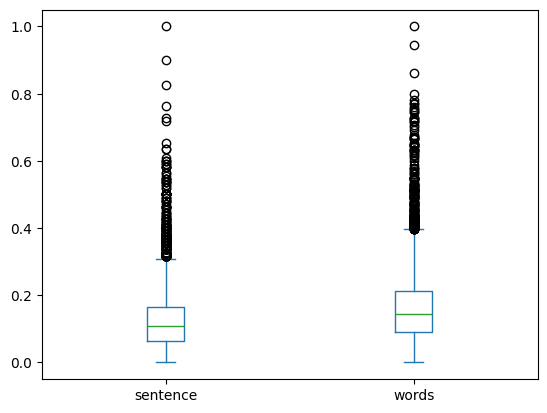

In [20]:
df_normalized = pd.DataFrame(X_normalized, columns=features)

df_normalized[['sentence', 'words']].plot.box()

- The boxplot shows that both sentence and words features are centered around the mean with similar variability, and both contain some outliers, indicating articles with higher word or sentence counts. 
- **These outliers could potentially be associated with novel content, making them worth further investigation.**

           PC1       PC2
0    -0.048719  0.017122
1    -0.150831  0.020000
2    -0.043548  0.024653
3    -0.039407  0.021160
4    -0.069414  0.010792
...        ...       ...
6099  0.005472 -0.052372
6100  0.005807 -0.028869
6101 -0.031491  0.062055
6102  0.000975 -0.024794
6103  0.038893  0.038367

[6104 rows x 2 columns]


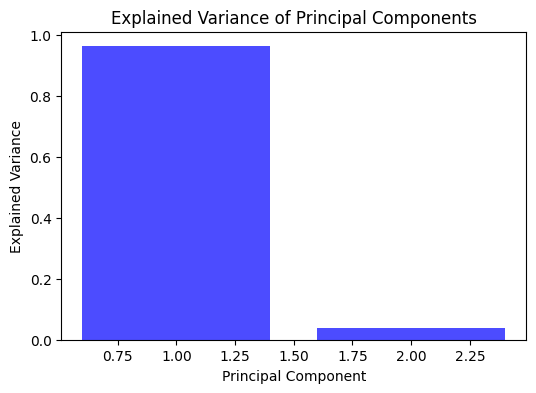


               PC1       PC2
sentence  0.644746  0.764397
words     0.764397 -0.644746


In [21]:
df_pca = pca_analises(X_normalized,features)

- **The first component** captures approximately **80%** of the variance, it is recommended to use only the first component and discard the original features, at least as an initial test. This approach would reduce dimensionality and could simplify the model without losing much information.

In [22]:
df_pca

,PC1,PC2
0,-0.048719,0.017122
1,-0.150831,0.020000
2,-0.043548,0.024653
3,-0.039407,0.021160
4,-0.069414,0.010792
...,...,...
6099,0.005472,-0.052372
6100,0.005807,-0.028869
6101,-0.031491,0.062055
6102,0.000975,-0.024794


In [23]:
# Reindxing
df_news.reset_index(drop=True, inplace=True)
df_pca.reset_index(drop=True, inplace=True)

df_news = pd.merge(df_news, df_pca[['PC1']], left_index=True, right_index=True, how='left')

df_news.drop(columns=['sentence', 'words'], inplace=True)

print(df_news.columns)
print(df_news.shape)

Index(['category', 'is_source', 'topic', 'DLA', 'content_no_sw', 'PC1'], dtype='object')
(6104, 6)


In [24]:
df_news['PC1_normalized'] = scaler.fit_transform(df_news[['PC1']])

In [25]:
from collections import Counter

def most_frequent_words_by_category(df, text_column='content_no_sw', category_column='category', top_n=10):
    result = {}
    for category in df[category_column].unique():
        texts = " ".join(df[df[category_column] == category][text_column])
        word_counts = Counter(texts.split())
        result[category] = word_counts.most_common(top_n)
    return result

# Ejemplo de uso
top_words = most_frequent_words_by_category(df_news, text_column='content_no_sw', category_column='category', top_n=10)
print(top_words)


{'SPORTS': [('ronaldo', 418), ('award', 396), ('fifa', 315), ('year', 236), ('messi', 228), ('player', 213), ('madrid', 204), ('club', 201), ('league', 195), ('good', 173)], 'BUSINESS': [('say', 2160), ('ban', 1190), ('company', 1041), ('official', 954), ('security', 835), ('airport', 832), ('india', 819), ('uber', 689), ('flight', 657), ('electronic', 621)], 'TERROR': [('say', 3396), ('attack', 2007), ('kill', 1724), ('people', 1677), ('pakistan', 1055), ('militant', 903), ('claim', 814), ('group', 794), ('year', 758), ('kansas', 734)], 'SOCIETY': [('yoga', 1509), ('say', 1073), ('state', 695), ('government', 675), ('day', 636), ('india', 499), ('minister', 433), ('farmer', 432), ('event', 395), ('international', 337)], 'ACCIDENT': [('say', 2300), ('accident', 1003), ('injure', 965), ('railway', 702), ('minister', 670), ('rescue', 620), ('people', 602), ('pradesh', 590), ('coach', 566), ('official', 559)], 'ARTS': [('film', 1756), ('say', 1354), ('actor', 1064), ('award', 919), ('best

In [26]:
from Exploratory_Analysis.lda import  preprocess_text_dual 
custom_stopwords = ['say', 'said', 'says', 'told']

# Preprocess the text
df_news = preprocess_text_dual(df_news, text_column='content_no_sw', custom_stopwords=custom_stopwords)

[nltk_data] Downloading package punkt to /home/mab0205/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/mab0205/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
from sklearn.preprocessing import OneHotEncoder

# Aplicar One-Hot Encoding a la columna 'category'
encoder = OneHotEncoder(sparse_output=False, drop='first')
category_encoded = encoder.fit_transform(df_news[['category']])

# Convertir a DataFrame y añadir al original
category_encoded_df = pd.DataFrame(category_encoded, columns=encoder.get_feature_names_out(['category']))
df_news = pd.concat([df_news.reset_index(drop=True), category_encoded_df.reset_index(drop=True)], axis=1)

In [28]:
df_news.columns

Index(['category', 'is_source', 'topic', 'DLA', 'content_no_sw', 'PC1',
       'PC1_normalized', 'cleaned_text', 'full_text', 'category_ARTS',
       'category_BUSINESS', 'category_CRIME', 'category_GOVT',
       'category_NATURE', 'category_POLITICS', 'category_SOCIETY',
       'category_SPORTS', 'category_TERROR'],
      dtype='object')

In [29]:
df_news['cleaned_text']

0       dangal baba ramdev wrestle russian olympic med...
1       pro wrestling league continue draw interest ma...
2       ongoing pro wrestling league haryana hammers j...
3       yoga guru baba ramdev display wrestling skill ...
4       yoga guru baba ramdev display wrestling skill ...
                              ...                        
6099    prime minister narendra modi inaugurate india ...
6100    modi address rally udhampur jammu kashmir tunn...
6101    union road transport minister nitin gadkari su...
6102    pm narendramodi unveil plaque inaugurate tunne...
6103    prime minister narendra modi today champion tu...
Name: cleaned_text, Length: 6104, dtype: object

##################################################################################
### Modelo

In [30]:
# Split the data into training and test sets
train_df = df_news[df_news['is_source'] == True].reset_index(drop=True)
test_df = df_news[df_news['is_source'] == False].reset_index(drop=True)


In [31]:
# Ejemplo de uso
top_words_train = most_frequent_words_by_category(train_df, text_column='cleaned_text', category_column='category', top_n=10)
print(top_words)

{'SPORTS': [('ronaldo', 418), ('award', 396), ('fifa', 315), ('year', 236), ('messi', 228), ('player', 213), ('madrid', 204), ('club', 201), ('league', 195), ('good', 173)], 'BUSINESS': [('say', 2160), ('ban', 1190), ('company', 1041), ('official', 954), ('security', 835), ('airport', 832), ('india', 819), ('uber', 689), ('flight', 657), ('electronic', 621)], 'TERROR': [('say', 3396), ('attack', 2007), ('kill', 1724), ('people', 1677), ('pakistan', 1055), ('militant', 903), ('claim', 814), ('group', 794), ('year', 758), ('kansas', 734)], 'SOCIETY': [('yoga', 1509), ('say', 1073), ('state', 695), ('government', 675), ('day', 636), ('india', 499), ('minister', 433), ('farmer', 432), ('event', 395), ('international', 337)], 'ACCIDENT': [('say', 2300), ('accident', 1003), ('injure', 965), ('railway', 702), ('minister', 670), ('rescue', 620), ('people', 602), ('pradesh', 590), ('coach', 566), ('official', 559)], 'ARTS': [('film', 1756), ('say', 1354), ('actor', 1064), ('award', 919), ('best

In [32]:
# Ejemplo de uso
top_words_test = most_frequent_words_by_category(test_df, text_column='cleaned_text', category_column='category', top_n=10)
print(top_words)

{'SPORTS': [('ronaldo', 418), ('award', 396), ('fifa', 315), ('year', 236), ('messi', 228), ('player', 213), ('madrid', 204), ('club', 201), ('league', 195), ('good', 173)], 'BUSINESS': [('say', 2160), ('ban', 1190), ('company', 1041), ('official', 954), ('security', 835), ('airport', 832), ('india', 819), ('uber', 689), ('flight', 657), ('electronic', 621)], 'TERROR': [('say', 3396), ('attack', 2007), ('kill', 1724), ('people', 1677), ('pakistan', 1055), ('militant', 903), ('claim', 814), ('group', 794), ('year', 758), ('kansas', 734)], 'SOCIETY': [('yoga', 1509), ('say', 1073), ('state', 695), ('government', 675), ('day', 636), ('india', 499), ('minister', 433), ('farmer', 432), ('event', 395), ('international', 337)], 'ACCIDENT': [('say', 2300), ('accident', 1003), ('injure', 965), ('railway', 702), ('minister', 670), ('rescue', 620), ('people', 602), ('pradesh', 590), ('coach', 566), ('official', 559)], 'ARTS': [('film', 1756), ('say', 1354), ('actor', 1064), ('award', 919), ('best

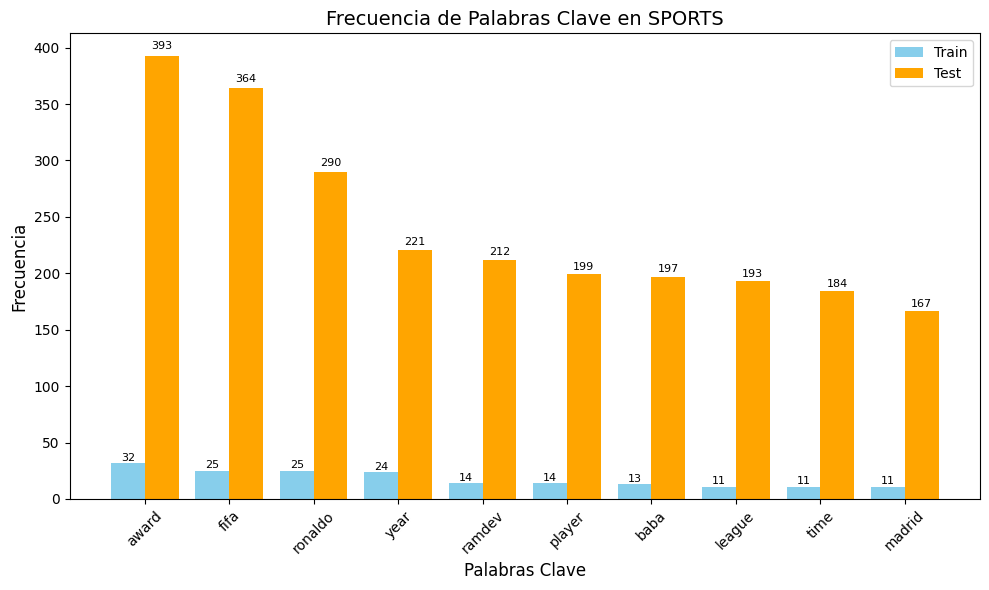

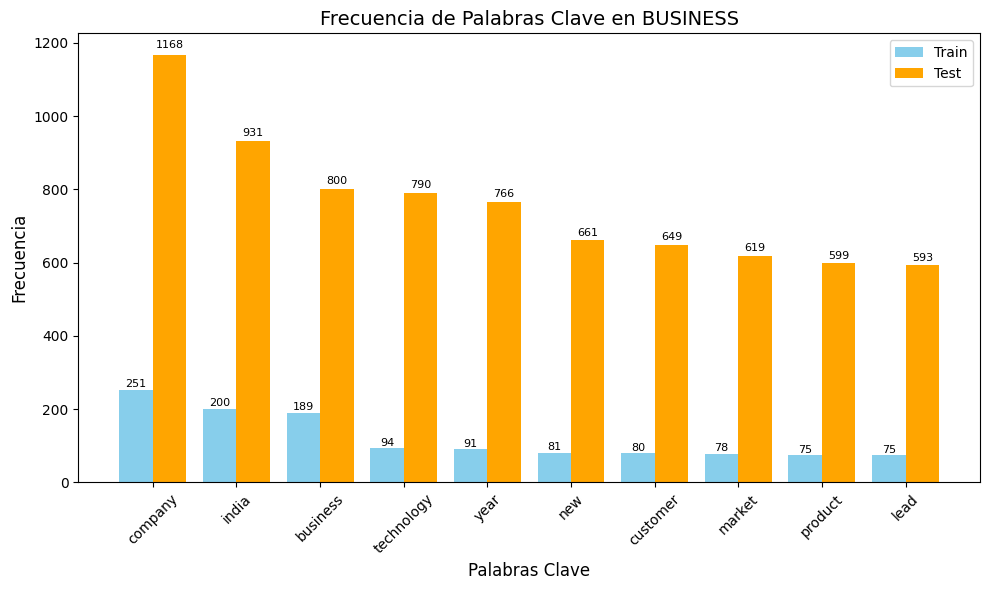

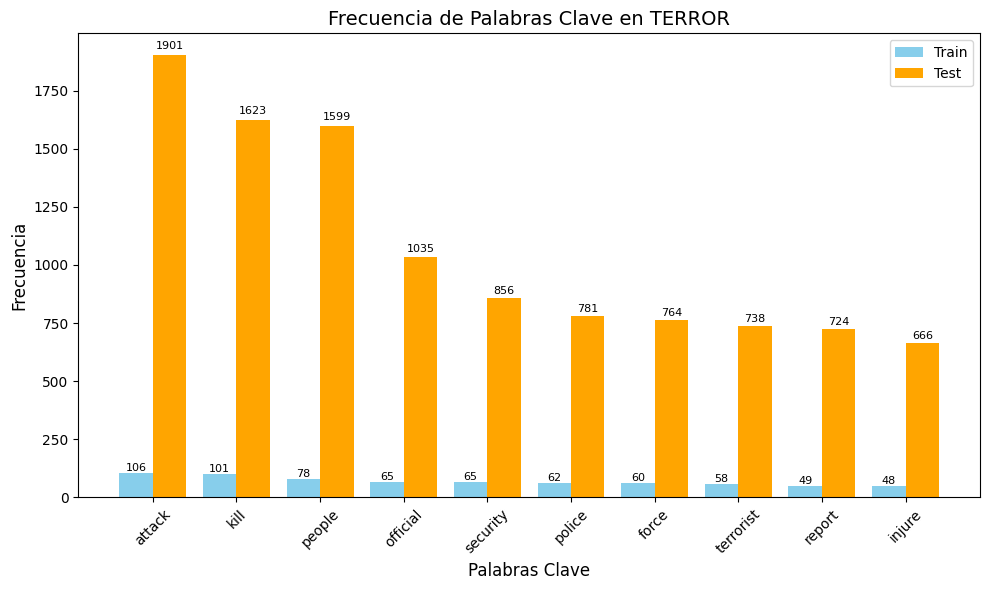

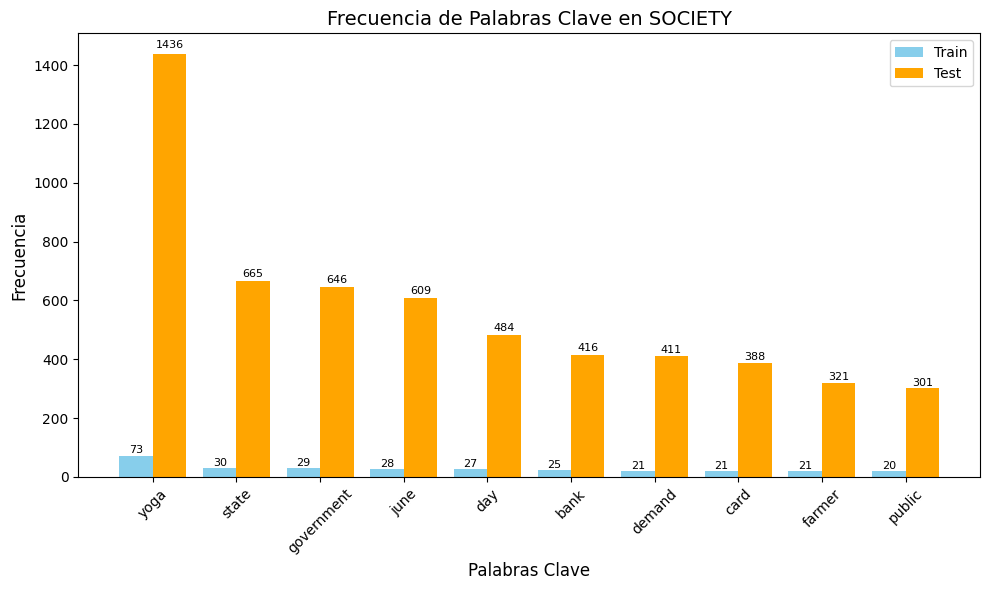

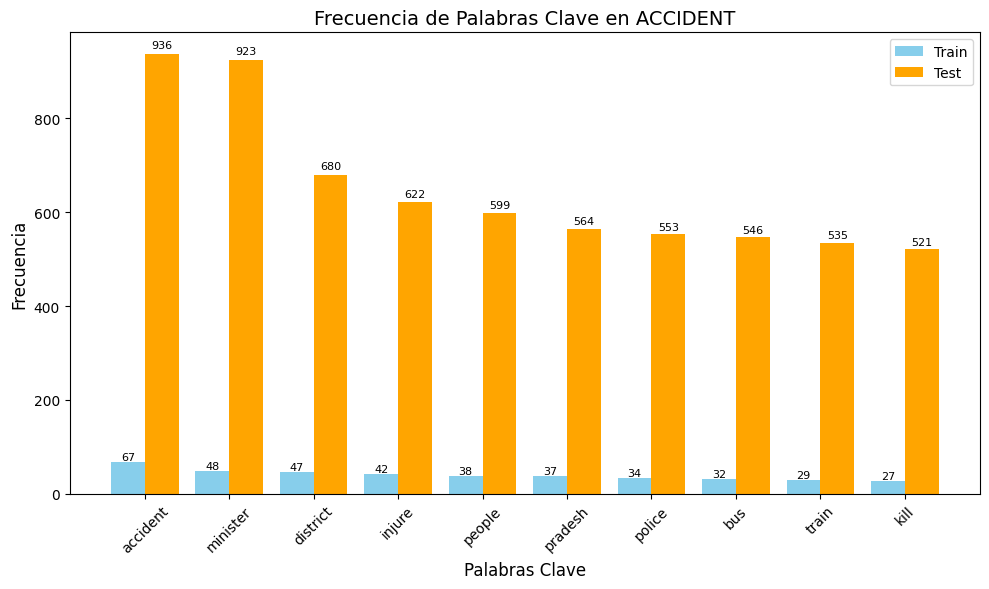

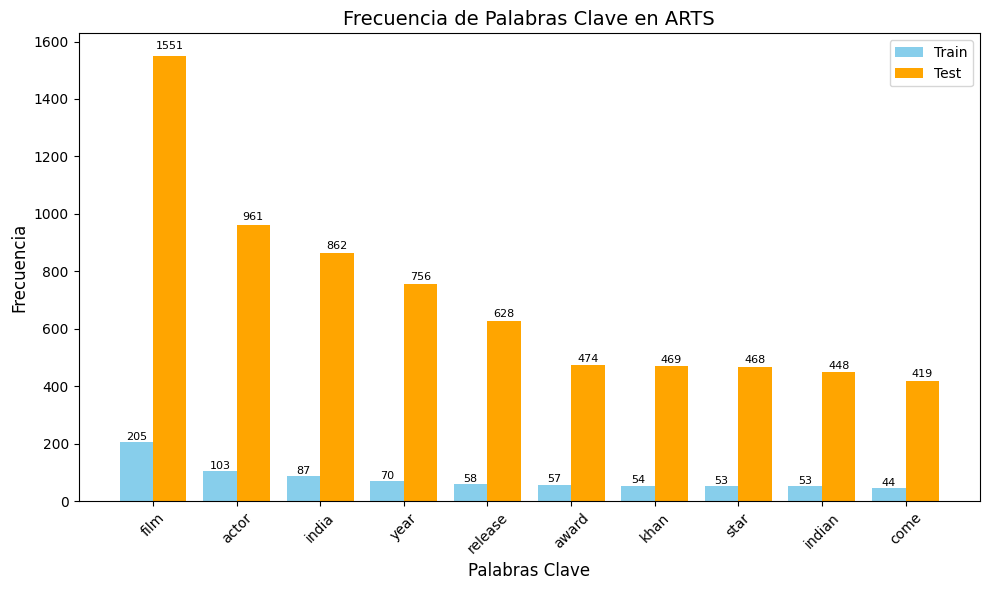

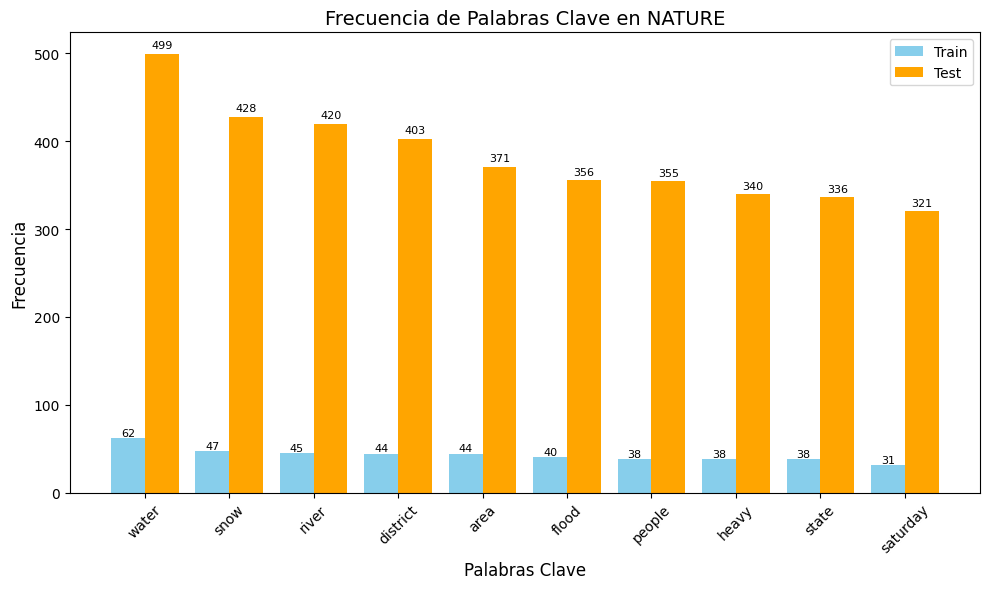

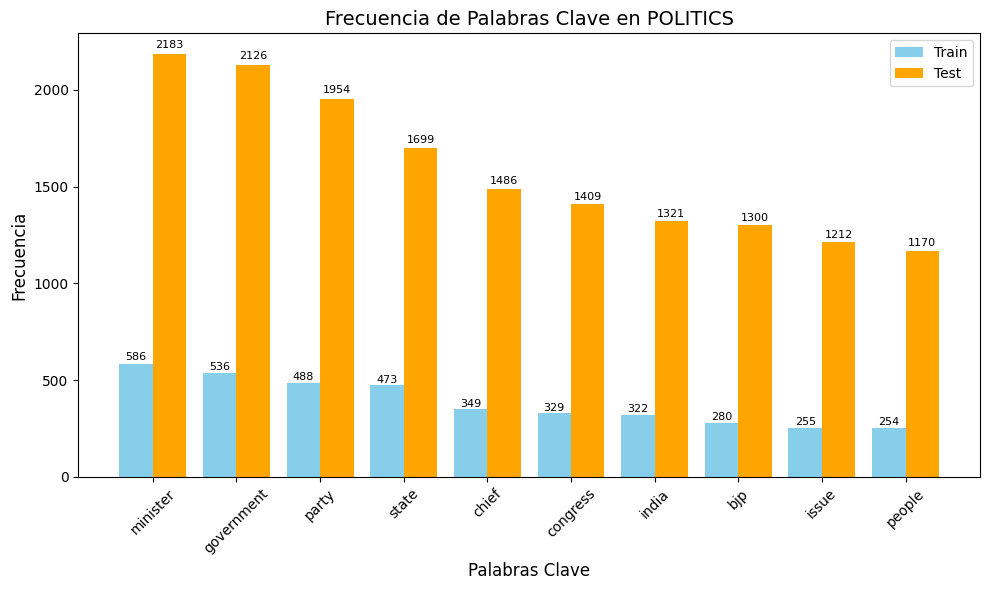

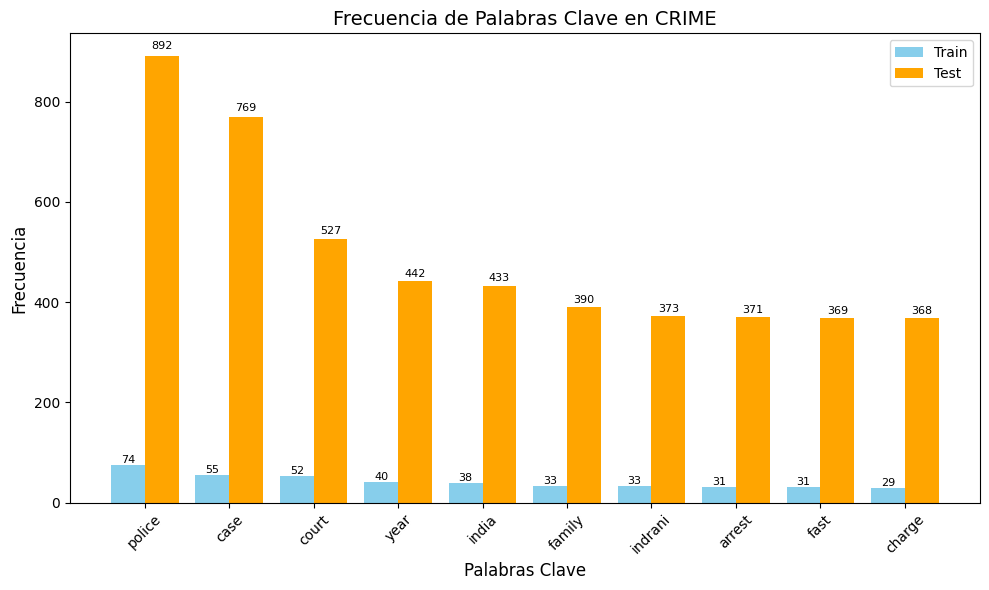

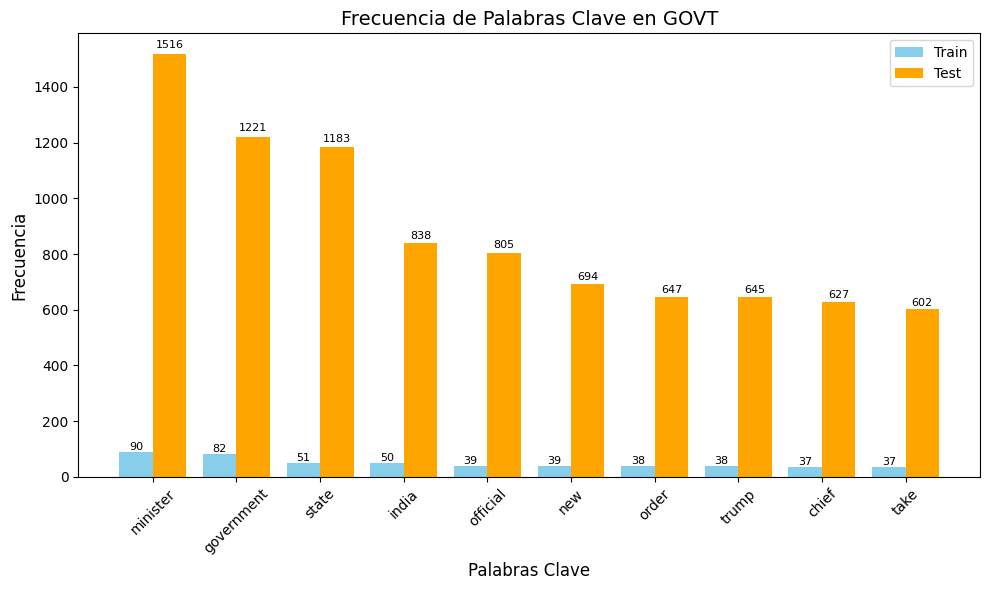

In [33]:
import matplotlib.pyplot as plt

# Crear gráfico comparativo por categoría
for category in top_words_train.keys():
    train_words, train_freqs = zip(*top_words_train[category])
    test_words, test_freqs = zip(*top_words_test[category])

    x = np.arange(len(train_words))  # Posiciones de las palabras clave

    fig, ax = plt.subplots(figsize=(10, 6))

    # Gráfico de barras
    bar1 = ax.bar(x - 0.2, train_freqs, 0.4, label='Train', color='skyblue')
    bar2 = ax.bar(x + 0.2, test_freqs, 0.4, label='Test', color='orange')

    # Etiquetas y formato
    ax.set_xlabel('Palabras Clave', fontsize=12)
    ax.set_ylabel('Frecuencia', fontsize=12)
    ax.set_title(f'Frecuencia de Palabras Clave en {category}', fontsize=14)
    ax.set_xticks(x)
    ax.set_xticklabels(train_words, fontsize=10, rotation=45)
    ax.legend()

    # Añadir valores encima de las barras
    for bar in bar1:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., 1.01*height, f'{int(height)}', ha='center', va='bottom', fontsize=8)

    for bar in bar2:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., 1.01*height, f'{int(height)}', ha='center', va='bottom', fontsize=8)

    plt.tight_layout()
    plt.show()


In [34]:
df_news.columns

Index(['category', 'is_source', 'topic', 'DLA', 'content_no_sw', 'PC1',
       'PC1_normalized', 'cleaned_text', 'full_text', 'category_ARTS',
       'category_BUSINESS', 'category_CRIME', 'category_GOVT',
       'category_NATURE', 'category_POLITICS', 'category_SOCIETY',
       'category_SPORTS', 'category_TERROR'],
      dtype='object')

### LOF vs Isolation Forest vs Elliptic Enveope 
-  contamination 0.42

In [35]:
aux_df = test_df
train_df = train_df.drop(columns=['PC1','is_source', 'category', 'topic','full_text','content_no_sw'])
test_df = test_df.drop(columns=['PC1','is_source', 'category', 'topic','full_text','content_no_sw'])

train_df.to_csv(f"{base_dir}/results/train_df.csv", index=False)
test_df.to_csv(f"{base_dir}/results/test_df.csv", index=False)

y_train = train_df['DLA']  # empty
y_test = test_df['DLA']

In [36]:
train_df

,DLA,PC1_normalized,cleaned_text,category_ARTS,category_BUSINESS,category_CRIME,category_GOVT,category_NATURE,category_POLITICS,category_SOCIETY,category_SPORTS,category_TERROR
0,0,0.127637,dangal baba ramdev wrestle russian olympic med...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0.046386,pro wrestling league continue draw interest ma...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,0.131751,ongoing pro wrestling league haryana hammers j...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,0.436486,star grab blagging right ahead old nemesis pic...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,0.219305,cristiano ronaldo name winner fifa best men pl...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
664,0,0.047222,rajya sabha pass gst bill new delhi rajya sabh...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
665,0,0.102661,gst bill table rajya sabha wednesday share tue...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
666,0,0.082079,new delhi little bit sail county long road tun...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
667,0,0.301144,km tunnel bypass landslide kud patnitop batote...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [37]:
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import classification_report
from sklearn.model_selection import ParameterGrid
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from matplotlib.legend_handler import HandlerPathCollection

In [38]:
category_columns = [
    'PC1_normalized', 'category_ARTS', 'category_BUSINESS', 'category_CRIME',
    'category_GOVT', 'category_NATURE', 'category_POLITICS', 'category_SOCIETY',
    'category_SPORTS', 'category_TERROR'
]
topics = [
    'category_ARTS', 'category_BUSINESS', 'category_CRIME',
    'category_GOVT', 'category_NATURE', 'category_POLITICS', 'category_SOCIETY',
    'category_SPORTS', 'category_TERROR'
]

In [39]:
def plot_elliptic_decision_boundary(X_train, X_test, y_test, elliptic_model, title="Elliptic Envelope"):

    # Crear una malla para la visualización de la frontera
    xx, yy = np.meshgrid(
        np.linspace(X_train[:, 0].min() - 1, X_train[:, 0].max() + 1, 500),
        np.linspace(X_train[:, 1].min() - 1, X_train[:, 1].max() + 1, 500)
    )
    
    # Evaluar la función de decisión en la malla
    Z = elliptic_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Predicciones en los datos de prueba
    y_pred_test = elliptic_model.predict(X_test)
    
    # Crear el gráfico
    plt.figure(figsize=(10, 7))
    plt.title(title)
    plt.contour(xx, yy, Z, levels=np.linspace(Z.min(), Z.max(), 7), cmap=plt.cm.Blues_r)
    plt.colorbar()
    
    # Dibujar la elipse aprendida
    plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='red', label="Learned frontier")
    
    # Puntos de entrenamiento (inliers)
    plt.scatter(X_train[:, 0], X_train[:, 1], c='black', edgecolor='k', s=20, label="Inliers")
    
    # Puntos de prueba (inliers y outliers)
    plt.scatter(
        X_test[y_pred_test == 1, 0], X_test[y_pred_test == 1, 1],
        c='blue', edgecolor='k', s=30, label="Test Inliers"
    )
    plt.scatter(
        X_test[y_pred_test == -1, 0], X_test[y_pred_test == -1, 1],
        c='red', edgecolor='k', s=30, label="Test Outliers"
    )
    
    # Leyenda y detalles
    plt.legend(loc="upper right")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()


In [40]:
def plot_lof_with_legend(X, lof_scores, n_errors, title="Local Outlier Factor (LOF)"):

    def update_legend_marker_size(handle, orig):
        "Personalizar el tamaño de los marcadores de la leyenda"
        handle.update_from(orig)
        handle.set_sizes([20])  # Tamaño de los marcadores en la leyenda

    # Normalizar los puntajes para los radios de los círculos
    radius = (lof_scores.max() - lof_scores) / (lof_scores.max() - lof_scores.min())

    # Graficar los puntos y los círculos escalados
    plt.scatter(X[:, 0], X[:, 1], color="k", s=3.0, label="Data points")
    scatter = plt.scatter(
        X[:, 0],
        X[:, 1],
        s=1000 * radius,  # Tamaño proporcional a los puntajes
        edgecolors="r",
        facecolors="none",
        label="Outlier scores",
    )

    # Configuración del gráfico
    plt.xlabel(f"prediction errors: {n_errors}")
    plt.legend(
        handler_map={scatter: HandlerPathCollection(update_func=update_legend_marker_size)}
    )
    plt.title(title)
    plt.show()


In [41]:
def analyze_performance_by_category(y_test, y_pred, categories, test_df):

    metrics_per_category = {}

    for category in categories:
        # Filtrar por categoría
        category_mask = test_df[category] == 1
        category_y_test = np.array(y_test)[category_mask]
        category_y_pred = np.array(y_pred)[category_mask]

        # Calcular métricas para la categoría actual
        report = classification_report(category_y_test, category_y_pred, output_dict=True, zero_division=0)
        metrics_per_category[category] = {
            'precision_macro_avg': report['macro avg']['precision'],
            'recall_macro_avg': report['macro avg']['recall'],
            'f1_macro_avg': report['macro avg']['f1-score']
        }

    return metrics_per_category


In [43]:
def grid_search_lof_with_text_and_categories(train_df, test_df, text_column='content_no_sw', category_columns=None, topics=None):
    param_grid = {
        'n_neighbors': [3, 5, 10, 20, 30],
        'metric': ['manhattan', 'l2','cityblock','euclidean', 'l1'], 
        'contamination': [0.4, 0.42, 0.5],
        'vectorizer': [CountVectorizer(), TfidfVectorizer()],
        'pca_components': [10, 20, 50, 100]          
    }
    # 'cosine', 'minkowski',
    best_params = None
    best_score = -np.inf
    results = []

    X_test_text = test_df[text_column]
    y_test = test_df['DLA']

    for params in ParameterGrid(param_grid):
        vectorizer = params.pop('vectorizer')
        pca_components = params.pop('pca_components')
        X_train_text = vectorizer.fit_transform(train_df[text_column])
        X_test_text_vec = vectorizer.transform(X_test_text)

        pca = PCA(n_components=pca_components)
        X_train_text_reduced = pca.fit_transform(X_train_text.toarray())
        X_test_text_reduced = pca.transform(X_test_text_vec.toarray())
        
        X_train_combined = np.hstack([ X_train_text_reduced,train_df[category_columns].values])
        X_test_combined = np.hstack([X_test_text_reduced, test_df[category_columns].values ])

        scaler = MinMaxScaler()
        X_train_combined = scaler.fit_transform(X_train_combined)
        X_test_combined = scaler.transform(X_test_combined)

        lof = LocalOutlierFactor(novelty=True, **params)
        lof.fit(X_train_combined)

        y_pred = lof.predict(X_test_combined)
        lof_scores = lof.decision_function(X_test_combined) 
        y_pred = [1 if pred == -1 else 0 for pred in y_pred]

        n_errors = (y_pred != y_test).sum()

        report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
        score = report['macro avg']['f1-score']
        

        results.append({
            'params': {**params, 'vectorizer': type(vectorizer).__name__},
            'f1_score': score,
            'report': report
        })

        if score > best_score:
            best_report = report
            best_score = score
            best_params = {**params, 'vectorizer': type(vectorizer).__name__}
            score_0 = report['0']['f1-score']
            score_1 = report['1']['f1-score']

    return {
        'X_test_combined' : X_test_combined,
        'y_pred' : y_pred,
        'lof_scores' : lof_scores,
        'n_errors' : n_errors,
        'best_params': best_params,
        'Macro avg results': best_score,
        'Novelty Results': score_1,
        'No Novelty Results': score_0,
        'best_report': best_report
    }

results_lof = grid_search_lof_with_text_and_categories(train_df, test_df, text_column='cleaned_text', category_columns=category_columns, topics=topics)

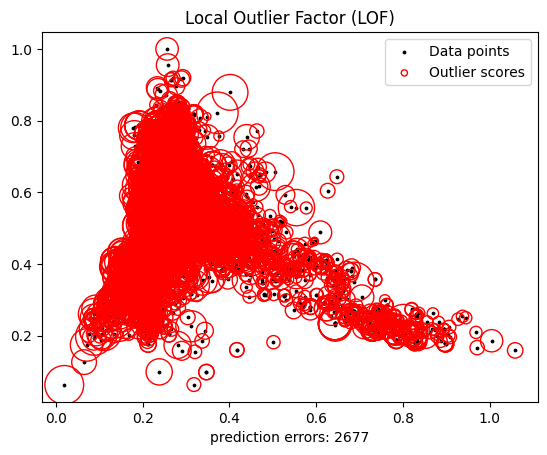

Results By Category LOF:
Metrics_by_cat: {'category_ARTS': {'precision_macro_avg': 0.31588541666666664, 'recall_macro_avg': 0.48351766197918605, 'f1_macro_avg': 0.3341064601748362}, 'category_BUSINESS': {'precision_macro_avg': 0.3497260516083422, 'recall_macro_avg': 0.36865936781942116, 'f1_macro_avg': 0.35611402582967505}, 'category_CRIME': {'precision_macro_avg': 0.28416398713826363, 'recall_macro_avg': 0.33722537465444496, 'f1_macro_avg': 0.2783076876013338}, 'category_GOVT': {'precision_macro_avg': 0.49641946165180056, 'recall_macro_avg': 0.49538247793396534, 'f1_macro_avg': 0.493270498023084}, 'category_NATURE': {'precision_macro_avg': 0.4093589743589744, 'recall_macro_avg': 0.4837471264367816, 'f1_macro_avg': 0.4257531840140536}, 'category_POLITICS': {'precision_macro_avg': 0.3429260979266464, 'recall_macro_avg': 0.43399676442891294, 'f1_macro_avg': 0.33981326644370125}, 'category_SOCIETY': {'precision_macro_avg': 0.44898477157360406, 'recall_macro_avg': 0.44036493101913665, 'f1_

In [52]:
plot_lof_with_legend(results_lof['X_test_combined'],results_lof['lof_scores'] , results_lof['n_errors'])

print("Results By Category LOF:")
metrics_by_cat_LOF = analyze_performance_by_category(y_test, results_lof['y_pred'], topics, test_df)

print("Metrics_by_cat:", metrics_by_cat_LOF)
print("Best params LOF:", results_lof['best_params'])
print("Best F1-Score LOF:", results_lof['Macro avg results'])
print("Novelty Results LOF:", results_lof['Novelty Results'])
print("No Novelty Results LOF:", results_lof['No Novelty Results'])
print(results_lof['best_report'])

In [45]:
results_lof['best_report']

{'0': {'precision': 0.6628553770086527,
  'recall': 0.6850846374960077,
  'f1-score': 0.673786712737553,
  'support': 3131.0},
 '1': {'precision': 0.5516143701682583,
  'recall': 0.5264756944444444,
  'f1-score': 0.5387519431490118,
  'support': 2304.0},
 'accuracy': 0.6178472861085557,
 'macro avg': {'precision': 0.6072348735884555,
  'recall': 0.605780165970226,
  'f1-score': 0.6062693279432824,
  'support': 5435.0},
 'weighted avg': {'precision': 0.6156981958200107,
  'recall': 0.6178472861085557,
  'f1-score': 0.6165429024096784,
  'support': 5435.0}}

In [56]:
def novelty_detection_with_isolation_forest(train_df, test_df, text_column='cleaned_text', y_test=None, category_columns=None, topics=None):
    vectorizer = TfidfVectorizer()
    X_train_text = vectorizer.fit_transform(train_df[text_column])
    X_test_text = vectorizer.transform(test_df[text_column])

    pca = PCA(n_components=50)
    X_train_text_reduced = pca.fit_transform(X_train_text.toarray())
    X_test_text_reduced = pca.transform(X_test_text.toarray())

    X_train_combined = np.hstack([ X_train_text_reduced,train_df[category_columns].values])
    X_test_combined = np.hstack([X_test_text_reduced, test_df[category_columns].values ])


    scaler = MinMaxScaler()
    X_train_combined = scaler.fit_transform(X_train_combined)
    X_test_combined = scaler.transform(X_test_combined)


    model = IsolationForest(n_estimators=500, contamination=0.42)
    model.fit(X_train_combined)


    predictions = model.predict(X_test_combined)
    predictions = [1 if pred == -1 else 0 for pred in predictions]

    report = classification_report(y_test, predictions, output_dict=True, zero_division=0)
    score = report['macro avg']['f1-score']
    score_0 = report['0']['f1-score']
    score_1 = report['1']['f1-score']   

    print("Results By Category IsolationForest:")
    metrics_by_cat = analyze_performance_by_category(y_test, predictions, topics, test_df)

    return {
        'metrics_by_cat' : metrics_by_cat,
        'Macro avg results': score,
        'Novelty Results': score_1,
        'No Novelty Results': score_0,
        'report':report
    }

results_iso = novelty_detection_with_isolation_forest(train_df, test_df, text_column='cleaned_text', y_test=y_test, category_columns=category_columns, topics=topics)
print("Metrics_by_cat:", results_iso['metrics_by_cat'])
print("Best F1-Score IsolationForest:", results_iso['Macro avg results'])
print("Novelty Results IsolationForest:", results_iso['Novelty Results'])
print("No Novelty Results LOF:", results_iso['No Novelty Results'])
print(results_iso['report'])

Results By Category IsolationForest:
Metrics_by_cat: {'category_ARTS': {'precision_macro_avg': 0.5680923642088691, 'recall_macro_avg': 0.5145193778208811, 'f1_macro_avg': 0.39862573099415205}, 'category_BUSINESS': {'precision_macro_avg': 0.6314371902607196, 'recall_macro_avg': 0.5942285041224971, 'f1_macro_avg': 0.5880690908104884}, 'category_CRIME': {'precision_macro_avg': 0.4246227364185111, 'recall_macro_avg': 0.4636621562636404, 'f1_macro_avg': 0.3556455931405124}, 'category_GOVT': {'precision_macro_avg': 0.4899807687741874, 'recall_macro_avg': 0.4913779012749265, 'f1_macro_avg': 0.4901261852142297}, 'category_NATURE': {'precision_macro_avg': 0.430101246105919, 'recall_macro_avg': 0.4834942528735632, 'f1_macro_avg': 0.43272745821502046}, 'category_POLITICS': {'precision_macro_avg': 0.4445121159332023, 'recall_macro_avg': 0.47280166651666844, 'f1_macro_avg': 0.3976870576339737}, 'category_SOCIETY': {'precision_macro_avg': 0.5153846153846154, 'recall_macro_avg': 0.5084557187360925, '

In [47]:
def grid_search_elliptic_with_text_and_categories(train_df, test_df, text_column='content_no_sw', category_columns=None, topics=None):
    param_grid = {
        'contamination': [0.4, 0.42, 0.5], 
        'support_fraction': [None, 0.1],  
        'vectorizer': [TfidfVectorizer(), CountVectorizer()],
        'pca_components': [5, 10, 15, 20, 50]    
    }

    best_params = None
    best_score = -np.inf
    results = []

    X_test_text = test_df[text_column]
    y_test = test_df['DLA']

    for params in ParameterGrid(param_grid):
        vectorizer = params.pop('vectorizer')
        n_pca_components = params.pop('pca_components')

        X_train_text = vectorizer.fit_transform(train_df[text_column])
        X_test_text_vec = vectorizer.transform(X_test_text)


        pca = PCA(n_components=n_pca_components)
        X_train_text_reduced = pca.fit_transform(X_train_text.toarray())
        X_test_text_reduced = pca.transform(X_test_text_vec.toarray())


        X_train_combined = np.hstack([ X_train_text_reduced,train_df[category_columns].values])
        X_test_combined = np.hstack([X_test_text_reduced, test_df[category_columns].values ])

        scaler = MinMaxScaler()
        X_train_combined = scaler.fit_transform(X_train_combined)
        X_test_combined = scaler.transform(X_test_combined)

        elliptic = EllipticEnvelope(**params)
        elliptic.fit(X_train_combined)

        y_pred = elliptic.predict(X_test_combined)
        y_pred = [1 if pred == -1 else 0 for pred in y_pred]  

        report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
        score = report['macro avg']['f1-score']

        results.append({
            'params': {**params, 'vectorizer': type(vectorizer).__name__, 'pca_components': n_pca_components},
            'f1_score': score,
            'report': report
        })

        if score > best_score:
            best_report = report
            best_score = score
            best_params = {**params, 'vectorizer': type(vectorizer).__name__, 'pca_components': n_pca_components}
            score_0 = report['0']['f1-score']
            score_1 = report['1']['f1-score']

        n_errors = (y_pred != y_test).sum()
    
    return {
        'X_train_combined' : X_train_combined,
        'X_test_combined' : X_test_combined,
        'y_pred' : y_pred,
        'elliptic' : elliptic,
        'n_errors' : n_errors,
        'best_params': best_params,
        'Macro avg results': best_score,
        'Novelty Results': score_1,
        'No Novelty Results': score_0,
        'best_report': best_report
    }


results_elip = grid_search_elliptic_with_text_and_categories(
    train_df, test_df, text_column='cleaned_text', category_columns=category_columns, topics=topics
)



In [ ]:
# plot_elliptic_decision_boundary(results_elip['X_train_combined'],results_elip['X_test_combined'],y_test,results_elip['elliptic'])

print("Results By Category Elliptical:")
metrics_by_cat_Elliptical = analyze_performance_by_category(y_test, results_elip['y_pred'], topics, test_df)

print("Metrics_by_cat:", metrics_by_cat_Elliptical)
print("Best params Elliptical:", results_elip['best_params'])
print("Best F1-Score Elliptical:", results_elip['Macro avg results'])
print("Novelty Results Elliptical:", results_elip['Novelty Results'])
print("No Novelty Results Elliptical:", results_elip['No Novelty Results'])
print(results_elip['best_report'])

Results By Category Elliptical:
Metrics_by_cat: {'category_ARTS': {'precision_macro_avg': 0.5174702471772963, 'recall_macro_avg': 0.5149483382446194, 'f1_macro_avg': 0.49808915961822}, 'category_BUSINESS': {'precision_macro_avg': 0.5829403095062639, 'recall_macro_avg': 0.586929656876943, 'f1_macro_avg': 0.5772446230931345}, 'category_CRIME': {'precision_macro_avg': 0.4878183620558182, 'recall_macro_avg': 0.49225229157573114, 'f1_macro_avg': 0.41394406364136693}, 'category_GOVT': {'precision_macro_avg': 0.4540529217948573, 'recall_macro_avg': 0.4170889179470415, 'f1_macro_avg': 0.32382789611265256}, 'category_NATURE': {'precision_macro_avg': 0.4558113246326174, 'recall_macro_avg': 0.46045977011494255, 'f1_macro_avg': 0.4573268921095008}, 'category_POLITICS': {'precision_macro_avg': 0.513240278899856, 'recall_macro_avg': 0.5132386222701242, 'f1_macro_avg': 0.5132369155152269}, 'category_SOCIETY': {'precision_macro_avg': 0.3862815884476534, 'recall_macro_avg': 0.5, 'f1_macro_avg': 0.43584